# Installing needed software

Modern scientific research often either requires or can greatly benefit from the use of computational tools. Even if you're not on the cutting edge, you can make your life better and easier using these tools to conduct and share your research. The goal here is to give a brief overview of the tools we'll be using in this course and how to install them along with other tools on your system:

* Installing **Python** and the **SciPy stack**
* Installing **R** and additional packages
* Installing **TeX** and **TeX Live**

A quick disclaimer and a few notes before we dive in. 

First, these instructions are oriented towards Unix-like operating systems (i.e. Linux, Mac OS X). If you are running Windows, strongly consider installing [Cygwin](https://www.cygwin.com/) or creating a [linux partition](http://www.everydaylinuxuser.com/2014/05/install-ubuntu-1404-alongside-windows.html) on your machine.

Second, the location of files may vary across operating systems. Keep in mind where the relevant locations are for your operating system.

# Python

## Description

[Python](https://www.python.org/) is a [widely-used, highly-extensible](https://www.python.org/about/success/#education), and easily-learned programming language.

In [1]:
from IPython.display import Image
Image(url='http://imgs.xkcd.com/comics/python.png')

Within the Python computing environment, we'll be using several useful extensions. Collectively, these are referred to as the [SciPy stack](http://www.scipy.org/stackspec.html#stackspec). The current version of the SciPy stack requires the following versions of various tools:

* [Python](https://www.python.org/)  (2.x >= 2.6 or 3.x >= 3.2) : see above, results may vary
* [NumPy](https://github.com/numpy/numpy)  (>= 1.6) : fundamental package needed for scientific computing with python
* [SciPy](https://github.com/scipy/scipy) (>= 0.10) : open-source software for mathematics, science, and engineering
* [Matplotlib](http://matplotlib.org/) (>= 1.1) : open-source plotting library, deeply integrated with python
* [IPython]() (>= 0.13) : a command shell for interactive computing in multiple programming languages
* [Pandas](https://github.com/pydata/pandas)  (>= 0.8) : fast, flexible, and expressive data structures
* [Sympy](http://www.sympy.org/en/index.html) (>= 0.7) : library for symbolic mathematics in python, moving towards a full computer algebra system

We'll also be using third-party [SciPy toolkits](https://scikits.appspot.com/):

* [Scikit-learn](http://scikit-learn.org/dev/index.html) : simple, efficient, and reusable tools for machine learning
* [Scikit-statsmodels](https://pypi.python.org/pypi/scikits.statsmodels) : Python package for statistical computations
* ...

You'll find lots of detailed tools at Scikits. If you're thinking about implementing something in your own work, check these kits and the Python Package Index ([PyPI](https://pypi.python.org/pypi)) to see if someone has already done the work.  Below we'll talk about how to install packages from these locations.

## Installation

If you're already started using some of these tools in your own research, then you've probably installed at least Python, and maybe more. To start off, let's find out what you've installed and where it's installed.

As a start let's find out the version of python we've got installed. You can ignore the first line, which just tells IPython to treat what follows as input to the bash shell. So far so good!

In [16]:
%%bash
echo "Python version is:"
python --version

Python version is:


Python 2.7.10 :: Anaconda 2.3.0 (64-bit)


Now, let's check to see what else is installed. Again, we can do this from the command line. But, since we're trying to find out whether a python package, rather than python itself is installed, we'll ask python to run the command in quotes. The option `-c` tells python to treat the quoted text as a command. The semicolon inside breaks up the commands. If something isn't installed, we'll get an error like the following.

In [3]:
%%bash
python -c "import notinstalledyet; print notinstalledyet.__version__"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: No module named notinstalledyet


Otherwise, we'll find out what version is installed.

In [4]:
%%bash
echo "NumPy version is:"
python -c "import numpy; print numpy.__version__"
echo "SciPy version is:"
python -c "import scipy; print scipy.__version__"
echo "Matplotlib version is:"
python -c "import matplotlib; print matplotlib.__version__"
echo "IPython version is:"
ipython -V
echo "Pandas version is:"
python -c "import pandas; print pandas.__version__"
echo "SymPy version is:"
python -c "import sympy; print sympy.__version__"

NumPy version is:
1.9.2
SciPy version is:
0.15.1
Matplotlib version is:
1.4.3
IPython version is:
3.2.0
Pandas version is:
0.16.2
SymPy version is:
0.7.6


Alright, it looks like we've got the SciPy stack installed. This is good, but not a trivial accomplishment. Sometimes getting to this point can be a bit frustrating and require a lot of time debugging and googling error messages.

In [5]:
Image(url='https://imgs.xkcd.com/comics/dependencies.png')

For the purposes of this course, we suggest using the [Anaconda](https://store.continuum.io/cshop/anaconda/) scientific Python distribution, which is supported on Linux, Mac OS X, and Windows. The benefits of using Anaconda are:

* Parallel to other Python installations
* Maintained by [Continuum](http://continuum.io/)
* [Free](https://en.wikipedia.org/wiki/The_Free_Software_Definition) in several ways

Take a few minutes to install Anaconda and then we'll give a quick run down of its structure. Know that we've installed Anaconda, let's take a look at where our operating system thinks Python is. The default installation location is in your home directory.

In [17]:
%%bash
which python

/home/cahern/anaconda/bin/python


But wait, didn't we say that Anaconda installs Python in parallel to other installations. It does, we've just listed the default location. Let's look for all locations of Python. The option `-a` selects all pathnames to installations of Python rather than just the default.

In [7]:
%%bash
which -a python

/home/cahern/anaconda/bin/python
/usr/bin/python


There we go! It now looks like we have two different versions of Python installed at different locations. Take a look at the versions of the different packages we'll be using in each of the two . Note that the versions used by different installations of Python are not necessarily the same. It's important to remember this as you install additional packages.

In [1]:
%%bash
for python_loc in $(which -a python) # For each python installation
    do 
        for package in numpy scipy matplotlib pandas sympy # For each of these packages
            do 
                echo "${python_loc}"
                echo "$package"
                "${python_loc}" -c "import $package; print $package.__version__"
            done
        echo
    done

/home/cahern/anaconda/bin/python
numpy
1.9.2
/home/cahern/anaconda/bin/python
scipy
0.15.1
/home/cahern/anaconda/bin/python
matplotlib
1.4.3
/home/cahern/anaconda/bin/python
pandas
0.16.2
/home/cahern/anaconda/bin/python
sympy
0.7.6

/usr/bin/python
numpy
1.8.2
/usr/bin/python
scipy
0.13.3
/usr/bin/python
matplotlib
1.3.1
/usr/bin/python
pandas
0.13.1
/usr/bin/python
sympy
0.7.4.1



Anaconda comes with a package and virtual environment manager `conda` with some pretty great functionality. Check out this [cheat sheet](http://conda.pydata.org/docs/_downloads/conda-cheatsheet.pdf) for an overview. We can list the packages currently installed for and accessible to Anaconda. This yields some of the information we found earlier such as the version numbers of the different packages we'll be using.

In [70]:
%%bash
conda list | grep "numpy" # Find the version of numpy installed
echo
conda list | head # Print the first few lines of packages
echo
conda list | wc -l # Print the count of packages installed via conda

numpy                     1.9.2                    py27_0  

# packages in environment at /home/cahern/anaconda:
#
_license                  1.1                      py27_0  
abstract-rendering        0.5.1                np19py27_0  
alabaster                 0.7.3                    py27_0  
anaconda                  2.3.0                np19py27_0  
argcomplete               0.8.9                    py27_0  
astropy                   1.0.3                np19py27_0  
babel                     1.3                      py27_0  
backports.ssl-match-hostname 3.4.0.2                   <pip>

198


Before doing anything else, let's update `conda` and `anaconda`. The first command will make sure that `conda` has the most up to date information. Note that the second command *does not* update all packages available to Anaconda to the latest versions. Rather, it updates to the most recent version where all of the packages work together.

In [22]:
%%bash
conda update conda
conda update anaconda

Fetching package metadata: ....
# All requested packages already installed.
# packages in environment at /home/cahern-adm/anaconda:
#
conda                     3.14.0                   py27_0  
Fetching package metadata: ....
# All requested packages already installed.
# packages in environment at /home/cahern-adm/anaconda:
#
anaconda                  2.2.0                np19py27_0  


In addition to the full SciPy stack Anaconda comes with [a lot](http://docs.continuum.io/anaconda/pkg-docs.html) of packages and tools ready to use. This is one of the benefits of using a maintained Python distribution: it's possible that you'll never have to install anything beyond what's already included. In addition to the packages that are already installed, there are more to be installed by searching.

In [71]:
%%bash
conda list | wc -l
conda search | grep '*' | wc -l

198
156


For example, if we want to use [MCMC methods](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo), we can install [PyMC](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/).

In [33]:
%%bash
conda search pymc

Fetching package metadata: ....
pymc                         2.2                 np17py27_p0  defaults        
                             2.2                  np17py27_0  defaults        
                             2.3                  np17py27_0  defaults        
                             2.3                  np18py27_1  defaults        
                             2.3.2                np18py27_0  defaults        
                             2.3.2                np18py26_0  defaults        
                             2.3.3                np19py27_0  defaults        
                             2.3.3                np19py26_0  defaults        
                             2.3.3                np18py27_0  defaults        
                             2.3.3                np18py26_0  defaults        
                             2.3.4               np19py34_p0  defaults        [mkl]
                             2.3.4                np19py34_0  defaults        
               

In [34]:
%%bash
conda install pymc

Fetching package metadata: ....
Solving package specifications: .
Package plan for installation in environment /home/cahern-adm/anaconda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-env-2.2.2            |           py27_0          21 KB
    pymc-2.3.4                 |       np19py27_0         1.5 MB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

    pymc:      2.3.4-np19py27_0

The following packages will be UPDATED:

    conda-env: 2.2.1-py27_0 --> 2.2.2-py27_0    

Proceed ([y]/n)? 
Fetching packages ...
conda-env-2.2. 100% |############################################################################################| Time: 0:00:00   3.04 MB/s
pymc-2.3.4-np1 100% |###################################################################################

Anaconda offers a powerful means of revising and managing installations. If you install a package and everything breaks, then you can revert to a previous state. To list the changes you've made to Anaconda, type the following, which will show you the various revisions you've made since you've installed Anaconda.

In [76]:
%%bash
conda list --revision | tail -n 50

    +r-lattice-0.20_31
    +r-mass-7.3_42
    +r-matrix-1.2_1
    +r-mgcv-1.8_6
    +r-nlme-3.1_121
    +r-nnet-7.3_10
    +r-recommended-3.2.0
    +r-rpart-4.1_10
    +r-spatial-7.3_10
    +r-survival-2.38_3

2015-07-15 12:27:14  (rev 11)
    +rpy2-2.5.6

2015-07-15 12:29:03  (rev 12)
     ipython  {3.2.0 -> 3.2.1}
     ipython-notebook  {3.2.0 -> 3.2.1}
     mistune  {0.5.1 -> 0.6}
     r  {3.2.0 -> 3.1.3}
     r-base  {3.2.0 -> 3.1.3}
     r-boot  {1.3_16 -> 1.3_16}
     r-class  {7.3_13 -> 7.3_12}
     r-cluster  {2.0.2 -> 1.15.3}
     r-codetools  {0.2_11 -> 0.2_11}
     r-foreign  {0.8_65 -> 0.8_63}
     r-kernsmooth  {2.23_15 -> 2.23_14}
     r-lattice  {0.20_31 -> 0.20_31}
     r-mass  {7.3_42 -> 7.3.37}
     r-matrix  {1.2_1 -> 1.2_1}
     r-mgcv  {1.8_6 -> 1.8_6}
     r-nlme  {3.1_121 -> 3.1.118}
     r-nnet  {7.3_10 -> 7.3_9}
     r-recommended  {3.2.0 -> 3.1.3}
     r-rpart  {4.1_10 -> 4.1_9}
     r-spatial  {7.3_10 -> 7.3_9}
     r-survival  {2.38_3 -> 2.38_2}
    +r-base6

You can revert to any of these points using the following, where `i` is the index of the point you want to revert to.

In [ ]:
%%bash
conda install --revision=i

This is great, but what if I want something that's outside of `conda search`? Well, for the most part, in this course we're going to treat Anaconda as a closed ecosystem. But, when we get to `R` below we'll outline some options.

In [11]:
Image(url='http://i.dailymail.co.uk/i/pix/2013/01/24/article-2267504-17212EB3000005DC-781_634x663.jpg')

There are two options if the closed ecosystem is cramping your style:

1. You can add packages via conda using [anaconda.org](https://anaconda.org/about) and [binstar](https://binstar.org/about) which is an online package hosting system from Continuum analytics
2. You can use the default python installation on your system and manually add packages using pip or source files

In this section, we'll take a look at the second option and return to the first option when we look at installing R.

You can break out into the larger world by changing your default Python installation. Navigate to your home directory and edit either the `.bashrc` or `.bash_profile` file. You can either comment out the following line:

In [2]:
%%bash
cd ~
grep "anaconda" .bashrc

export PATH="/home/cahern/anaconda/bin:$PATH"


Or you can edit the line so that your system will look in the Anaconda distribution second:

Reload the bash script, and `which -a python` should either no longer contain Anaconda or the Anaconda installation should be second. You can still use the Python installed by Anaconda, but it won't be the default.

To install more python packages you'll probably want to install [pip](https://pip.pypa.io/en/stable/installing.html#install-pip), which is a python package manager. It will allow you to install packages from the Python Package Index (PyPI) with a single command. It is important to note that there can be multiple versions of pip installed. Check which version is being used to install things.

In [79]:
%%bash 
which -a pip

/home/cahern/anaconda/bin/pip
/usr/local/bin/pip
/usr/bin/pip


The Anaconda python installation does not have access to packages installed via the default system pip, and the default python installation on your system does not have access to the packages installed via Anaconda or the Anaconda version of pip.

If we want to install things solely to the system default python installation, we can:

1. Set up aliases for the different commands in `.bashrc` or `.bash_profile`
2. Uninstall the Anaconda pip

To do the first, add the following lines to  `.bashrc` or `.bash_profile` and run the following:

For the second, do the following:

In [ ]:
%%bash
conda uninstall pip

We can take a look at the list of packages installed by the different version of pip:

In [5]:
%%bash
for pip_loc in $(which -a pip)
    do
        echo "${pip_loc}"
        "${pip_loc}" list | tail
        "${pip_loc}" list | wc -l
        echo
    done

/home/cahern/anaconda/bin/pip
textblob (0.9.1)
Theano (0.7.0)
toolz (0.7.2)
tornado (4.2)
ujson (1.33)
unicodecsv (0.9.4)
Werkzeug (0.10.4)
xlrd (0.9.3)
XlsxWriter (0.7.3)
xlwt (1.0.0)
115

/usr/local/bin/pip
tornado (4.2)
Twisted-Core (13.2.0)
Twisted-Web (13.2.0)
unity-lens-photos (1.0)
urllib3 (1.7.1)
wheel (0.24.0)
xdiagnose (3.6.3build2)
xlrd (0.9.2)
xlwt (0.7.5)
zope.interface (4.0.5)
94

/usr/bin/pip
Twisted-Core (13.2.0)
Twisted-Web (13.2.0)
unity-lens-photos (1.0)
urllib3 (1.7.1)
wheel (0.24.0)
wsgiref (0.1.2)
xdiagnose (3.6.3build2)
xlrd (0.9.2)
xlwt (0.7.5)
zope.interface (4.0.5)
96



We can also install additional packages via the following, but be conscientious about what `pip` you're using and where it's being installed.

In [6]:
%%bash
pip install textblob

That wraps up installing python and getting things up and running. We'll now move on to `R`.

# R

## Description

[R](http://www.r-project.org/) is a [widely-used](http://www.nature.com/news/programming-tools-adventures-with-r-1.16609) programming language and software environment for statistical computing and graphics.

In [22]:
from IPython.display import Image
Image(url='http://1.bp.blogspot.com/-W8bv1BMOwEk/UjtKZ22SGXI/AAAAAAAAAFs/FCJiV-k-4PQ/s1600/R+Pirate.png')

## Installation

`R` can be downloaded from the closest [mirror server](http://cran.r-project.org/mirrors.html).  Follow the installation instructions. In addition, we'll be using [RStudio](https://www.rstudio.com/) as a development environment for data analysis and document creation. Go ahead, download and install or update both if you need to.

You can integrate `R` and `RStudio` with Anaconda in two ways. In fact, one of the most striking benefits of IPython notebooks is the transition to more language agnostic framework as part of `Jupyter` (`= Julia + Python + R`). Ultimately, you can run notebooks using kernels in [many langauges](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) (e.g. bash, python, R, Matlab, etc.).

To give a little taste of the flexibility and scope of the project, we'll use the aptly-named `rmagic`. This will allow us to run `R` code inside of a cell in a `Python` notebook. First, let's get a sense of the range of potential functionality:

In [10]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%debug 

Now let's try the `%R` magic:

In [8]:
%load_ext rpy2.ipython

ImportError: No module named rpy2.ipython

And we can do all the normal things we like to do in `R`, like pirate hats:

In [12]:
%%R
R.home()

[1] "/usr/lib/R"


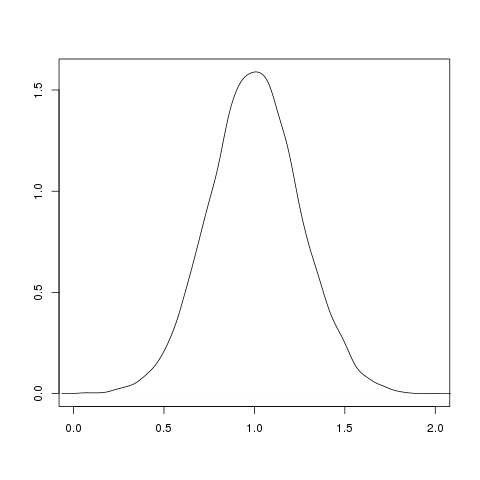

In [13]:
%%R
x<-rnorm(n=10000, mean=1, sd=.25)
plot(density(x), type='l', main='',xlim=c(0,2), ylab='', xlab='', )

Or plots of dots:

In [7]:
%%R
library(ggplot2)
x<-rnorm(n=10000, mean=1, sd=.25)
y<-rnorm(n=10000, mean=1, sd=.25)
qplot(x,y)

ERROR: Cell magic `%%R` not found.


There are two ways of getting this magic working:

1. **Install** `R` via `conda` creating a parallel distribution
2. Install `rpy2` via conda and **integrate** the default `R` distribution

We'll walk through each of the options noting that if you use `R` occasionaly then the first option is quick and painless. If `R` is your finely-tuned workhorse, then the second option is probably best. However, support for `R` within the Anaconda ecosystem [is growing](http://continuum.io/conda-for-R), and managing your `R` installation via conda may be a viable option.

### Installing R via `conda`

Even if you want to keep your default `R` installation, go ahead and walk through these steps and then use `conda install --revision=number` to revert back to the state before you installed everything.

To take the first route, simply type the following which will search the `r` channel on [binstar](https://binstar.org/r) and [anaconda.org](https://anaconda.org/r) for the packages `r`, `rpy2`, and `r-irkernel`.

In [12]:
%%bash
conda install -c r r rpy2 r-irkernel

Fetching package metadata: ......
Solving package specifications: .......................
Package plan for installation in environment /home/cahern/anaconda:

The following packages will be REMOVED:

    r-nlme: 3.1.118-0

Proceed ([y]/n)? 
Unlinking packages ...
[      COMPLETE      ]|###############################################################################################################| 100%


Note that this will install several other packages that are available via some [linux package managers](https://cran.rstudio.com/bin/linux/ubuntu/)  (e.g. r-cran-class, r-cran-cluster, r-cran-mgcv, etc.). This just means that there will be more installed when you inspect the library path.

In [21]:
%%R
.libPaths()

[1] "/home/cahern/R/x86_64-pc-linux-gnu-library/3.2"
[2] "/usr/local/lib/R/site-library"                 
[3] "/usr/lib/R/site-library"                       
[4] "/usr/lib/R/library"                            


In [23]:
%ls ~/anaconda/lib/R/library/

chron/       ggplot2/    latticeExtra/  munsell/       sandwich/  TH.data/
colorspace/  gridExtra/  magrittr/      plyr/          scales/    yaml/
crayon/      gtable/     maptools/      proto/         sp/        zoo/
dichromat/   highr/      markdown/      RColorBrewer/  stringi/
formatR/     knitr/      memoise/       Rcpp/          stringr/
Formula/     labeling/   mime/          reshape2/      testthat/


Once `R` has been installed via conda, we can check for different versions and where they are installed:

In [15]:
%%bash
which -a R

/usr/bin/R


You can check out where `R` installs libraries and packages:

In [16]:
%%R
.libPaths()

[1] "/home/cahern/R/x86_64-pc-linux-gnu-library/3.2"
[2] "/usr/local/lib/R/site-library"                 
[3] "/usr/lib/R/site-library"                       
[4] "/usr/lib/R/library"                            


Take a look at the packages that are available to the anaconda `R` installation:

In [17]:
%ls /home/cahern/anaconda/lib/R/library/

chron/       ggplot2/    latticeExtra/  munsell/       sandwich/  TH.data/
colorspace/  gridExtra/  magrittr/      plyr/          scales/    yaml/
crayon/      gtable/     maptools/      proto/         sp/        zoo/
dichromat/   highr/      markdown/      RColorBrewer/  stringi/
formatR/     knitr/      memoise/       Rcpp/          stringr/
Formula/     labeling/   mime/          reshape2/      testthat/


The last thing to consider if you've decided to go all in on Anaconda is integration with `RStudio`. Try opening `RStudio` up and typing the following:

In [19]:
%%R
R.home()

[1] "/usr/lib/R"


To use the Anaconda `R` installation you can specify the following variable in either `.bashrc` or `.bash_profile`, which will tell `RStudio` where to look for `R`:

Reload the file:

In [ ]:
%%bash
source ~/.bashrc

The `R` version should be the Anaconda installation and `R.home()` should point to the Anaconda installation location.

### Integrating `R` with `Anaconda`

The second option is only slightly more involved. If you want to integrate your current system installation of `R` with Anaconda you need to build the `rpy2` package in a format that `conda` can install. If you installed anything via `conda` according to the previous installation go ahead and roll it back using the following, where `i` is the most recent revision:

In [ ]:
%%bash
conda list --revision=i

Execute the following, which will install `rpy2` and link to your local `R` installation. You can test this out by running the code above, it should yield different outputs.

In [20]:
%%bash
cd ~/Desktop
git clone https://github.com/TheClimateCorporation/conda-recipes
cd conda-recipes
conda build rpy2
conda install rpy2 --use-local

Installing package into ‘/home/cahern/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)
trying URL 'http://cran.r-project.org/src/contrib/ggplot2_1.0.1.tar.gz'
Content type 'application/x-gzip' length 2351203 bytes (2.2 MB)
downloaded 2.2 MB


The downloaded source packages are in
	‘/tmp/RtmpjPNEjR/downloaded_packages’


# TeX

## Description

TeX is an open source, powerful, and flexible typesetting system that is the standard in many fields. The learning curve is steep relative to other word processing programs, but arguably pays off in terms of expressiveness and customizability.

## Installation

To install TeX you'll need to install the appropriate version of [TeXLive]() for your system. Note that this can take a long time. It might be best to leave this for later when you have a couple of hours to occasioanlly check in on the install process.

The last thing we'll need with regard to typesetting is the [Pandoc]() package, which allows for automatic conversion between different document formats (e.g. LaTeX, Markdown, pdf, etc.). Go ahead and install the appropriate package for your system.

# Summary 

At the end of following these instructions you should have the following:

* SciPy stack (see above for details)
* R and RStudio
* TeXLive
* Pandoc

Unfortunately, this doesn't mean things will have gone smoothly for you up to this point. In fact, it would be surprising if there were no issues. The best way to resolve issues is to consult the [oracle](http://www.lmgtfy.com).